In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [5]:
# Dicionário contendo dataframes principais
main_dataframes = {}

In [8]:
# BLOCO PRINCIPAL: base da geodiversidade de publicação de periódicos

# Atribuindo variável à base de dados de: Geodiversidade dos periódicos acadêmicos

# Os dados desta base apresentam o nome, a afiliação institucional e a localização geográfica dos publicadores em periódicos ranqueados como A* pela 2019 ABDC Journal Quality List.

path_geodiverse = '/content/drive/MyDrive/PS_Analytica/geodiverse_data.csv'
df_geodiverse = pd.read_csv(path_geodiverse, sep = ';')

# Removendo linhas com valores nulos

df_geodiverse = df_geodiverse.dropna(subset=['Country1'])

# Contando a quantidade de publicações por país

total_paises = df_geodiverse["Country1"].count()

s_publi_por_paises = df_geodiverse["Country1"].value_counts() # serie contendo número de publicações por país

df_publi_por_paises = pd.DataFrame({"Posição": range(1, len(s_publi_por_paises)+1),
                                   "País": s_publi_por_paises.index,
                                   "Publicações": s_publi_por_paises.values}) # dataframe contendo número de publicações por país, estes ordenados por maior número de publicações

# Criando um dataframe com os top 10 países que mais publicam periódicos + o Brasil

df_publi_top10eBR = df_publi_por_paises.head(10)
new_row = {'Posição': 11 , 'País': "Brasil", 'Publicações': 6}
df_publi_top10eBR.loc[len(df_publi_top10eBR)] = new_row
main_dataframes["df_publi"] = df_publi_top10eBR 

<ipython-input-8-c4fc8049c5bb>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_publi_top10eBR.loc[len(df_publi_top10eBR)] = new_row


In [58]:
df_publi_top10eBR 

,Posição,País,Publicações
0,1,USA,1489
1,2,UK,212
2,3,France,81
3,4,Canada,73
4,5,Germany,70
5,6,Switzerland,54
6,7,Spain,49
7,8,Australia,49
8,9,Netherlands,45
9,10,Italy,43


In [71]:
(212/total_paises)*100

8.998302207130731

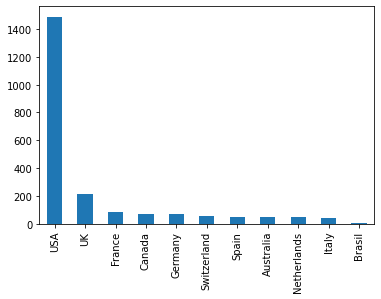

In [10]:
paises = df_publi_top10eBR["País"].values
publicacoes = df_publi_top10eBR["Publicações"].values
s_publi_top10eBR = pd.Series(publicacoes, index = paises)
ax_publi_por_paises = s_publi_top10eBR.plot.bar(x='lab', y='val')

In [62]:
#BLOCO PRINCIPAL: Base dos dados dos PIB's dos países

# Atribuindo variável à base de dados de: PIB dos países em USD

path_PIB = '/content/drive/MyDrive/PS_Analytica/PIB_paises.csv'
df_PIB = pd.read_csv(path_PIB, sep = ',')

# Criando novo df apenas com as colunas 'Country Name' e '2019'.

paises = df_PIB['Country Name'].values 
pib = df_PIB['2019'].values
df2_PIB = pd.DataFrame({"País": paises, "PIB 2019" : pib})  

# Removendo linhas com valor do PIB "NaN"
df2_PIB = df2_PIB.dropna(subset=['PIB 2019'])

# Substituindo os nomes dos países para que fiquem iguais aos que constam na lista dos top 10 países publicadores de periódicos + Brasil
df2_PIB = df2_PIB.replace("United States", "USA")
df2_PIB = df2_PIB.replace("United Kingdom", "UK")
df2_PIB = df2_PIB.replace("Brazil", "Brasil")

# Removendo linhas referentes aos países que não constam na lista dos top 10 países publicadores de periódicos + Brasil
s2_PIB = pd.Series(df2_PIB['PIB 2019'].values, index= df2_PIB['País'].values)

def remover_linhas_paises():
  lista_pais_publi = list(df_publi_por_paises["País"].values)
  lista_pais_pib = list(s2_PIB.index)
  lista_pib = list(s2_PIB.values)
  d = {"País": [], "PIB 2019": []}
  for i in lista_pais_pib:
    ind = lista_pais_pib.index(i)
    if (i in lista_pais_publi[0:10]) or (i=="Brasil"):
      d['País'].append(i)
      d["PIB 2019"].append(lista_pib[ind])
  df3_PIB = pd.DataFrame(d)
  main_dataframes["df_pib"] = df3_PIB
  return df3_PIB #df3_PIB # DataFrame contendo países da lista de publicações e seus respectivos PIB's

remover_linhas_paises()

,País,PIB 2019
0,Australia,1.391302e+12
1,Brasil,1.953064e+12
2,Canada,1.749888e+12
3,Switzerland,7.224932e+11
4,Germany,4.089754e+12
5,Spain,1.431194e+12
6,France,2.861603e+12
7,UK,2.899334e+12
8,Italy,2.086428e+12
9,Netherlands,9.007767e+11


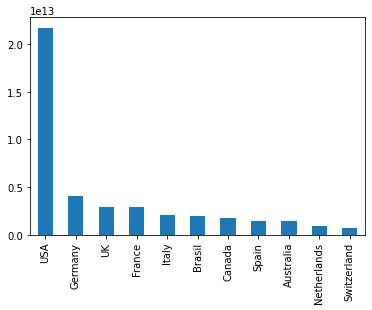

In [39]:
ax_pib_por_paises = s3_PIB.plot.bar(x='lab', y='val')

In [61]:
# Criando um dataframe cujas colunas são: index, País, PIB 2019, Publicações 2019 (4 colunas)

def inclui_publi():
  # Chamando os 2 dataframes
  df_pib = main_dataframes['df_pib']
  df_publi = main_dataframes['df_publi']

  # Ordenando os 2 dataframes por ordem alfabética
  df_pib = df_pib.sort_values(by=['País'])
  df_publi = df_publi.sort_values(by=['País'])

  # Listas
  l_pais_pib = list(df_pib["País"].values)
  l_pib = list(df_pib["PIB 2019"].values)
  l_pais_publi = list(df_publi["País"].values)
  l_publi = list(df_publi["Publicações"].values)

  # Criando novo df com publicações incluídas
  '''i = 0
  while i < len(l_pais_pib):'''
  df_geo_cruzado = df_pib
  df_geo_cruzado["Publicações"] = l_publi

  # Criando coluna da razão entre número de publicações / PIB
  publi_por_pib = []
  i = 0
  while i < len(l_publi):
    publi_por_pib.append(l_publi[i]/l_pib[i])
    i+=1
  df_geo_cruzado["Publicações por PIB"] = publi_por_pib

  # Adicionando ao dicionario
  main_dataframes["df_geo_cruzado"] = df_geo_cruzado

  #print(df_pib)
  #print(df_publi)
  #print(df_geo_cruzado)
  df_geo_cruzado = df_geo_cruzado
  return df_geo_cruzado.sort_values(by=['PIB 2019'], ascending = False)
    
inclui_publi()

,País,PIB 2019,Publicações,Publicações por PIB
10,USA,2.171340e+13,1489,6.857518e-11
4,Germany,4.089754e+12,70,1.711595e-11
7,UK,2.899334e+12,212,7.312025e-11
6,France,2.861603e+12,81,2.830581e-11
8,Italy,2.086428e+12,43,2.060939e-11
1,Brasil,1.953064e+12,6,3.072096e-12
2,Canada,1.749888e+12,73,4.171695e-11
5,Spain,1.431194e+12,49,3.423716e-11
0,Australia,1.391302e+12,49,3.521880e-11
9,Netherlands,9.007767e+11,45,4.995689e-11


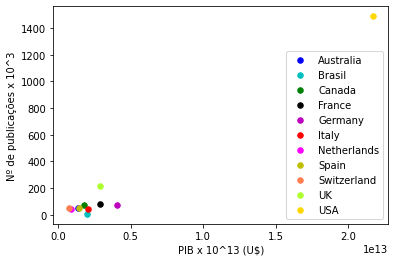

In [32]:
paises = main_dataframes["df_geo_cruzado"]["País"].values
x = main_dataframes["df_geo_cruzado"]["PIB 2019"].values
y = (main_dataframes["df_geo_cruzado"]["Publicações"].values)
#colors = list(np.random.randint(low = 1,high=50,size=len(x)))

plt.xlabel("PIB x 10^13 (U$)")
plt.ylabel("Nº de publicações x 10^3")

colors = ['b','c','g','k','m','r', 'fuchsia', 'y', 'coral','greenyellow', 'gold']

g = 0
while g < len(x):
  plt.scatter(x[g], y[g], s = 30, c = colors[g], label = paises[g])
  g+=1

plt.legend(loc = 'lower right')

<BarContainer object of 11 artists>

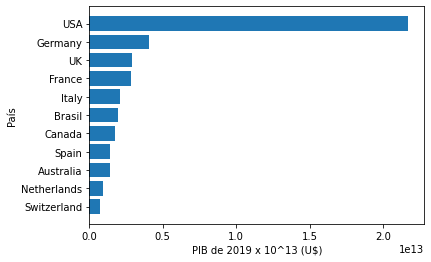

In [51]:
df_histo_pais_pib = main_dataframes["df_geo_cruzado"].sort_values(by=["PIB 2019"], ascending = True)
x = df_histo_pais_pib["País"].values
y = df_histo_pais_pib["PIB 2019"].values

plt.xlabel('PIB de 2019 x 10^13 (U$)')
plt.ylabel('País')

plt.barh(x, y)

In [64]:
main_dataframes["df_geo_cruzado"].sort_values(by=['Publicações por PIB'], ascending = False)[["País", 'Publicações por PIB']]

,País,Publicações por PIB
3,Switzerland,7.474118e-11
7,UK,7.312025e-11
10,USA,6.857518e-11
9,Netherlands,4.995689e-11
2,Canada,4.171695e-11
0,Australia,3.521880e-11
5,Spain,3.423716e-11
6,France,2.830581e-11
8,Italy,2.060939e-11
4,Germany,1.711595e-11


<BarContainer object of 11 artists>

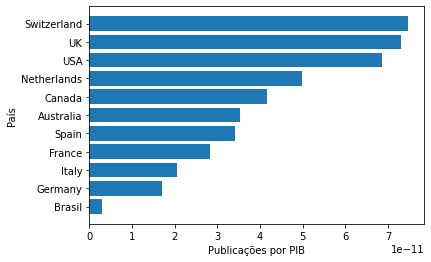

In [56]:
df_histo_pais_pib = main_dataframes["df_geo_cruzado"].sort_values(by=["Publicações por PIB"], ascending = True)
x = df_histo_pais_pib["País"].values
y = df_histo_pais_pib["Publicações por PIB"].values

plt.xlabel('Publicações por PIB')
plt.ylabel('País')

plt.barh(x, y)

In [66]:
df_geodiverse.head()

,Journal,is_Top5,Date,Role,FirstName,Surname,Affiliation1,Country1,Continent1,Location1,Affiliation2,Country2,Continent2,Location2
0,AEJ: Applied Economics,0.0,31/07/2020,Co-editor,David,Deming,"Harvard, Cambridge",USA,North America,"42.376971, -71.116735",NaN,NaN,NaN,NaN
1,AEJ: Applied Economics,0.0,31/07/2020,Co-editor,Seema,Jayachandran,"Northwestern, Evanston, Illinois",USA,North America,"42.056483, -87.675106",NaN,NaN,NaN,NaN
2,AEJ: Applied Economics,0.0,31/07/2020,Co-editor,Ilyana,Kuziemko,Princeton,USA,North America,"40.343139, -74.655121",NaN,NaN,NaN,NaN
3,AEJ: Applied Economics,0.0,31/07/2020,Co-editor,Camille,Landais,LSE,UK,Europe,"51.514479, -0.116741",NaN,NaN,NaN,NaN
4,AEJ: Applied Economics,0.0,31/07/2020,Co-editor,Neale,Mahoney,Chicago,USA,North America,"41.788584, -87.598885",NaN,NaN,NaN,NaN


In [67]:
df_PIB.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.623748e+09,2.671949e+09,2.729743e+09,2.795031e+09,2.922787e+09,3.076219e+09,3.193425e+09,2.620980e+09,3.130833e+09,NaN
1,Africa Eastern and Southern,AFE,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.714256e+11,9.869029e+11,9.436320e+11,9.021876e+11,9.182290e+11,9.520708e+11,1.005228e+12,9.567559e+11,1.029716e+12,NaN
2,Afghanistan,AFG,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.147012e+10,2.123442e+10,2.063865e+10,1.965478e+10,1.935426e+10,1.918122e+10,1.993740e+10,1.949926e+10,1.569539e+10,NaN
3,Africa Western and Central,AFW,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,1.142597e+10,1.254398e+10,1.345620e+10,1.428623e+10,...,7.448700e+11,8.342294e+11,8.194155e+11,7.435683e+11,6.843885e+11,7.102836e+11,7.556635e+11,7.665827e+11,8.164518e+11,NaN
4,Angola,AGO,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.215521e+11,1.301412e+11,1.091928e+11,7.149622e+10,5.980900e+10,5.854231e+10,6.586175e+10,5.832066e+10,5.887879e+10,NaN
